In [1]:
ReloadProject('deep_learning')

Path c:\Workspace\git\ added to PYTHON_PATH.
Path c:\Workspace\git\deep_learning added to PYTHON_PATH.


Using TensorFlow backend.


notebook_init.py imported and reloaded
reloaded: a3c_impl
forwarded symbol: a3c_impl
reloaded: base
forwarded symbol: base
reloaded: circular_world_env
forwarded symbol: circular_world_env
reloaded: environment_impl
forwarded symbol: environment_impl
reloaded: guided_environments
forwarded symbol: guided_environments
reloaded: gym
forwarded symbol: gym
reloaded: keras
forwarded symbol: keras
reloaded: layers
forwarded symbol: layers
reloaded: logging
forwarded symbol: logging
reloaded: model_builder
forwarded symbol: model_builder
reloaded: models
forwarded symbol: models
reloaded: numpy
forwarded symbol: numpy
reloaded: numpy_util
forwarded symbol: numpy_util
reloaded: optimizers
forwarded symbol: optimizers
reloaded: policy_impl
forwarded symbol: policy_impl
reloaded: qfunc_impl
forwarded symbol: qfunc_impl
reloaded: runner_extension_impl
forwarded symbol: runner_extension_impl
reloaded: runner_impl
forwarded symbol: runner_impl
reloaded: running_environment
forwarded symbol: running

In [16]:
batch_size = 64  # used in qfunc and runner.
env = circular_world_env.CircularWorld(size=5)
qfunc = qfunc_impl.DQN(
  state_space_dim=1,
  action_space_size=3,
  hidden_layer_sizes=(20, 20, 20),
  training_batch_size=batch_size,
)
runner = runner_impl.ExperienceReplayRunner(experience_capacity=128, experience_sample_batch_size=batch_size)

In [17]:
%%time
# Train
logging.ENV.debug_verbosity = 2
policy = policy_impl.GreedyPolicyWithRandomness(epsilon=1.0)
runner.Run(env=env, qfunc=qfunc, policy=policy, num_of_episodes=10)

# Test
logging.ENV.debug_verbosity = 2
policy = policy_impl.GreedyPolicy()
runner.Run(env=env, qfunc=qfunc, policy=policy, num_of_episodes=1)

[21:49:38] q_base.py:376 Episode 0/10: total_reward = -24.00, total_steps=499
[21:49:38] q_base.py:376 Episode 1/10: total_reward = -43.00, total_steps=499
[21:49:39] q_base.py:376 Episode 2/10: total_reward = -44.00, total_steps=499
[21:49:40] q_base.py:376 Episode 3/10: total_reward = -31.00, total_steps=499
[21:49:41] q_base.py:376 Episode 4/10: total_reward = -26.00, total_steps=499
[21:49:42] q_base.py:376 Episode 5/10: total_reward = -26.00, total_steps=499
[21:49:43] q_base.py:376 Episode 6/10: total_reward = -19.00, total_steps=499
[21:49:43] q_base.py:376 Episode 7/10: total_reward = -36.00, total_steps=499
[21:49:44] q_base.py:376 Episode 8/10: total_reward = -36.00, total_steps=499
[21:49:45] q_base.py:376 Episode 9/10: total_reward = -47.00, total_steps=499
[21:49:46] q_base.py:376 Episode 0/1: total_reward = 1.00, total_steps=499
CPU times: user 9.84 s, sys: 67.7 ms, total: 9.91 s
Wall time: 9.97 s


In [18]:
states = env.GetAllStates()
values = qfunc.GetValues(states)
for s, v in zip(states, values):
    print(s, v)

[-5] [2.148796  3.8355637 4.2409115]
[-4] [1.9212042 3.2581062 3.613132 ]
[-3] [1.7698092 2.675985  2.9766078]
[-2] [1.2808111 1.9046876 2.0524676]
[-1] [0.6161698 1.0002772 1.0567639]
[0] [-1.4937061e-01  1.4901161e-08 -1.3962418e-01]
[1] [0.9399597 0.8654816 0.6803488]
[2] [1.8285743 1.6658494 1.3919125]
[3] [2.6159778 2.3770437 1.9863846]
[4] [3.3541648 3.0275536 2.4906538]
[5] [4.003992  3.6275032 2.9122505]


## A3C

In [2]:
running_environment.ForceCpuForTheRun()

In [7]:
batch_size = 64  # used in qfunc and runner.
env = circular_world_env.CircularWorld(size=5)
brain = a3c_impl.A3C(
    model=a3c_impl.CreateModel(
        state_shape=(1,),
        action_space_size=3,
        hidden_layer_sizes=(20, 20, 20),
    )
)
runner = runner_impl.ExperienceReplayRunner(experience_capacity=128, experience_sample_batch_size=batch_size)
runner.AddCallback(runner_extension_impl.ProgressTracer(report_every_num_of_episodes=10))

[22:22:35] c:\Workspace\git\deep_learning\engine\a3c_impl.py:46 WARNING: only one A3C instance can be active; the previous instance <deep_learning.engine.a3c_impl.A3C object at 0x000002534BCDBA90> is now deactivated.


[22:22:59] c:\Workspace\git\deep_learning\engine\runner_extension_impl.py:58 Episode 10/100: avg_reward = -33.50, avg_steps=500.00 (over 10 episodes)
[22:23:07] c:\Workspace\git\deep_learning\engine\runner_extension_impl.py:58 Episode 20/100: avg_reward = -46.00, avg_steps=500.00 (over 10 episodes)
[22:23:15] c:\Workspace\git\deep_learning\engine\runner_extension_impl.py:58 Episode 30/100: avg_reward = -48.10, avg_steps=500.00 (over 10 episodes)
[22:23:24] c:\Workspace\git\deep_learning\engine\runner_extension_impl.py:58 Episode 40/100: avg_reward = -47.90, avg_steps=500.00 (over 10 episodes)
[22:23:32] c:\Workspace\git\deep_learning\engine\runner_extension_impl.py:58 Episode 50/100: avg_reward = -47.50, avg_steps=500.00 (over 10 episodes)
[22:23:40] c:\Workspace\git\deep_learning\engine\runner_extension_impl.py:58 Episode 60/100: avg_reward = -47.00, avg_steps=500.00 (over 10 episodes)
[22:23:48] c:\Workspace\git\deep_learning\engine\runner_extension_impl.py:58 Episode 70/100: avg_rew

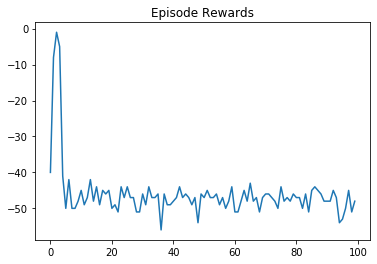

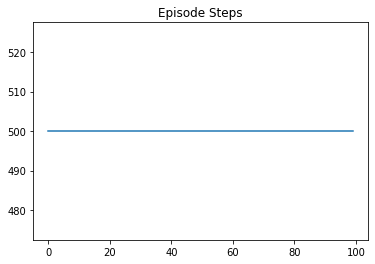

Wall time: 1min 22s


In [8]:
%%time
logging.ENV.debug_verbosity = 2
policy = policy_impl.GreedyPolicyWithDecreasingRandomness(
    initial_epsilon=1.0, final_epsilon=0.05, decay_by_half_after_num_of_episodes=2)
runner.Run(env=env, brain=brain, policy=policy, num_of_episodes=100)

[22:24:45] c:\Workspace\git\deep_learning\engine\runner_extension_impl.py:72 Total: run 1 episodes, avg_reward = -51.00, avg_steps=500.00


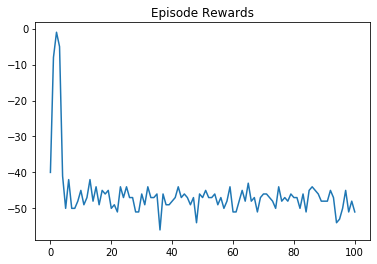

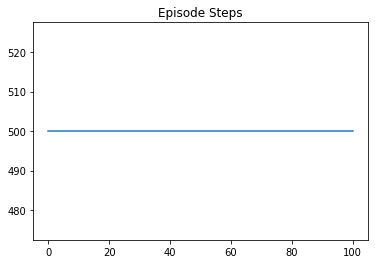

In [10]:
logging.ENV.debug_verbosity = 2
policy = policy_impl.GreedyPolicy()
runner.Run(env=env, brain=brain, policy=policy, num_of_episodes=1)